In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\jalpa\\Downloads\\placement.csv")

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
167,6.65,48.0,1
308,7.20,47.0,1
950,6.65,33.0,1
327,8.21,56.0,0
226,6.79,21.0,1


C:\Users\jalpa\AppData\Local\Temp\ipykernel_28424\2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

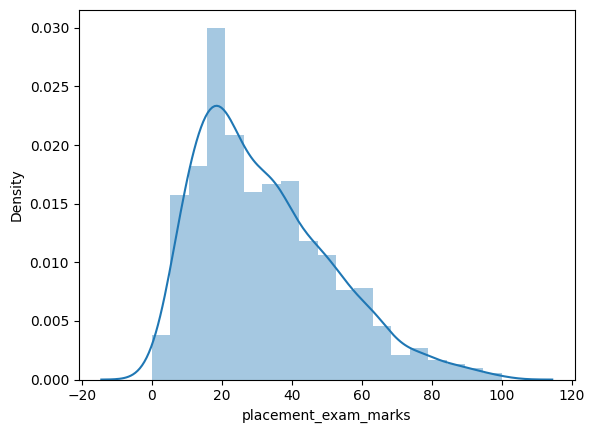

In [4]:
sns.distplot(df['placement_exam_marks'])

In [5]:
df['placement_exam_marks'].skew()

0.8356419499466834

C:\Users\jalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='placement_exam_marks'>

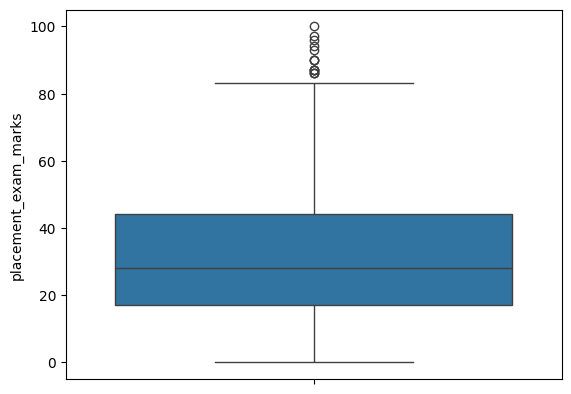

In [6]:
sns.boxplot(df['placement_exam_marks'])

In [7]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [8]:
iqr = percentile75 - percentile25

In [9]:
iqr

27.0

In [11]:
upper_limit = percentile75 + 1.5 * (iqr)
lower_limit = percentile25 - 1.5 * (iqr)

In [12]:
new_df = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]

In [13]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,985.000000,985.000000,985.00000
mean,6.961594,31.339086,0.48934
std,0.614734,17.857633,0.50014
min,4.890000,0.000000,0.00000
25%,6.550000,17.000000,0.00000
50%,6.960000,28.000000,0.00000
75%,7.370000,43.000000,1.00000
max,9.120000,83.000000,1.00000


In [14]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [17]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit, np.where(
        new_df_cap['placement_exam_marks'] < lower_limit, 
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [18]:
new_df_cap.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


# Day 44

In [28]:
df = pd.read_csv("C:\\Users\\jalpa\\Downloads\\weight-height.csv")

In [29]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\jalpa\AppData\Local\Temp\ipykernel_28424\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

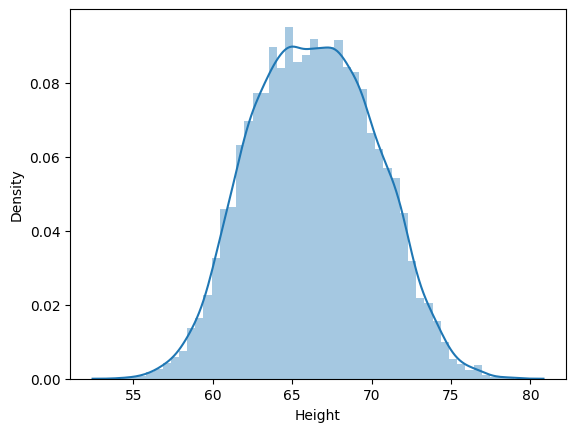

In [30]:
sns.distplot(df['Height'])

C:\Users\jalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Height'>

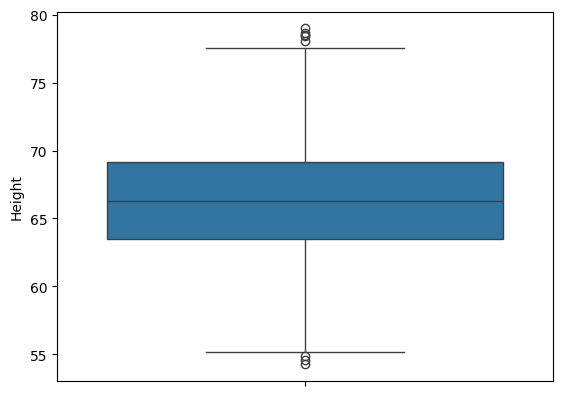

In [31]:
sns.boxplot(df['Height'])

In [32]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [33]:
new_df = df[(df['Height'] < upper_limit) & (df['Height'] > lower_limit)]

In [34]:
new_df.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


In [35]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [36]:
#winsorization technique
df['Height'] = np.where(
    df['Height'] >= upper_limit,
    upper_limit,
    np.where(
        df['Height'] <= lower_limit,
        lower_limit,
        df['Height']
    )
)

In [37]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.366281,161.440357
std,3.795717,32.108439
min,58.134412,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,74.785790,269.989699


C:\Users\jalpa\AppData\Local\Temp\ipykernel_28424\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

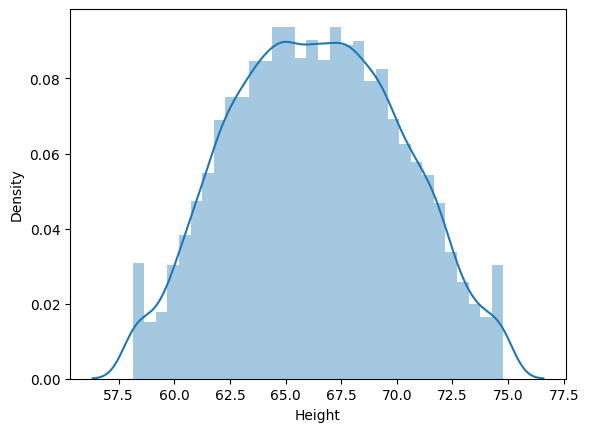

In [38]:
sns.distplot(df['Height'])